# Datos con visualizaciones usando mapas

## Cual es el tipo de propiedad mas popular en Capital Federal

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import matplotlib.pylab as plt
%matplotlib inline
%config IPCompleter.greedy=True

# Barrios csv
barrios_csv = pd.read_csv('/home/matias/Escritorio/Geopandas/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]
 
# load the shapefile with geopandas
# File can be downloaded from: http://data.buenosaires.gob.ar/dataset/comunas
barrios = gpd.read_file('/home/matias/Escritorio/Enviroment/barrios_badata.shp') 


  

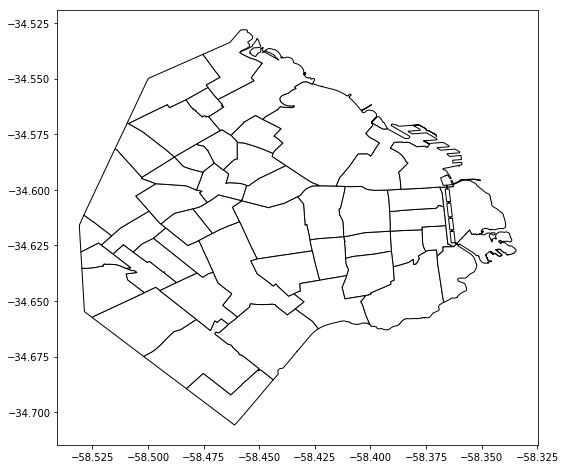

In [2]:
barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
mapa_base = barrios_pd.to_crs(epsg=4326)
mapa_base.plot(color='white', edgecolor='black',figsize= (12,8))


In [3]:
#Data de properati
df = pd.read_csv('/home/matias/Escritorio/Enviroment/datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propDepto = propCF#[propCF['property_type'] == 'apartment']

propCapital = propDepto[['property_type','place_name','rooms','lat','lon','price']]
propCapital = propCapital[propCapital['lon']>-61]
propCapital = propCapital[propCapital['lat']<-34.25]
propCapital = propCapital[propCapital['price']<500000]

propCapital.dropna(inplace = True)
propCapital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 360720 to 493583
Data columns (total 6 columns):
property_type    21273 non-null object
place_name       21273 non-null object
rooms            21273 non-null float64
lat              21273 non-null float64
lon              21273 non-null float64
price            21273 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


/home/matias/anaconda2/envs/geoenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,6,9,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


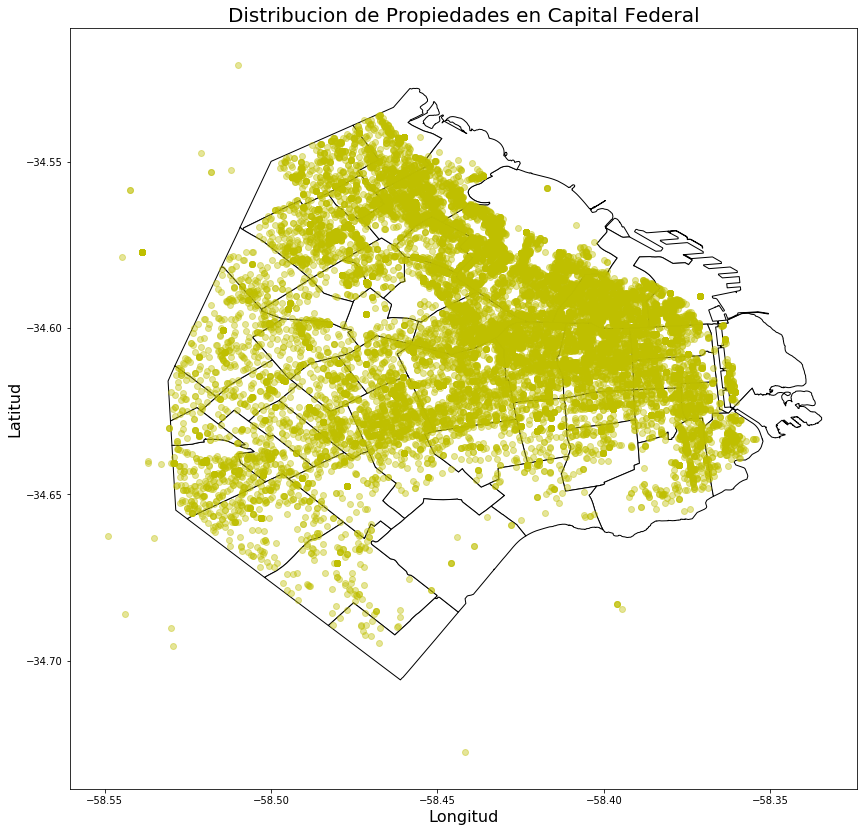

In [4]:
#Visualizamos todas als propiedades dentro del mapa de capital federal
mapa_base.plot(color='white', edgecolor='black',figsize= (18,14))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4, c='y')

plt.title('Distribucion de Propiedades en Capital Federal', fontsize= 20)
plt.ylabel("Latitud", fontsize=16)
plt.xlabel("Longitud", fontsize=16)
plt.show()

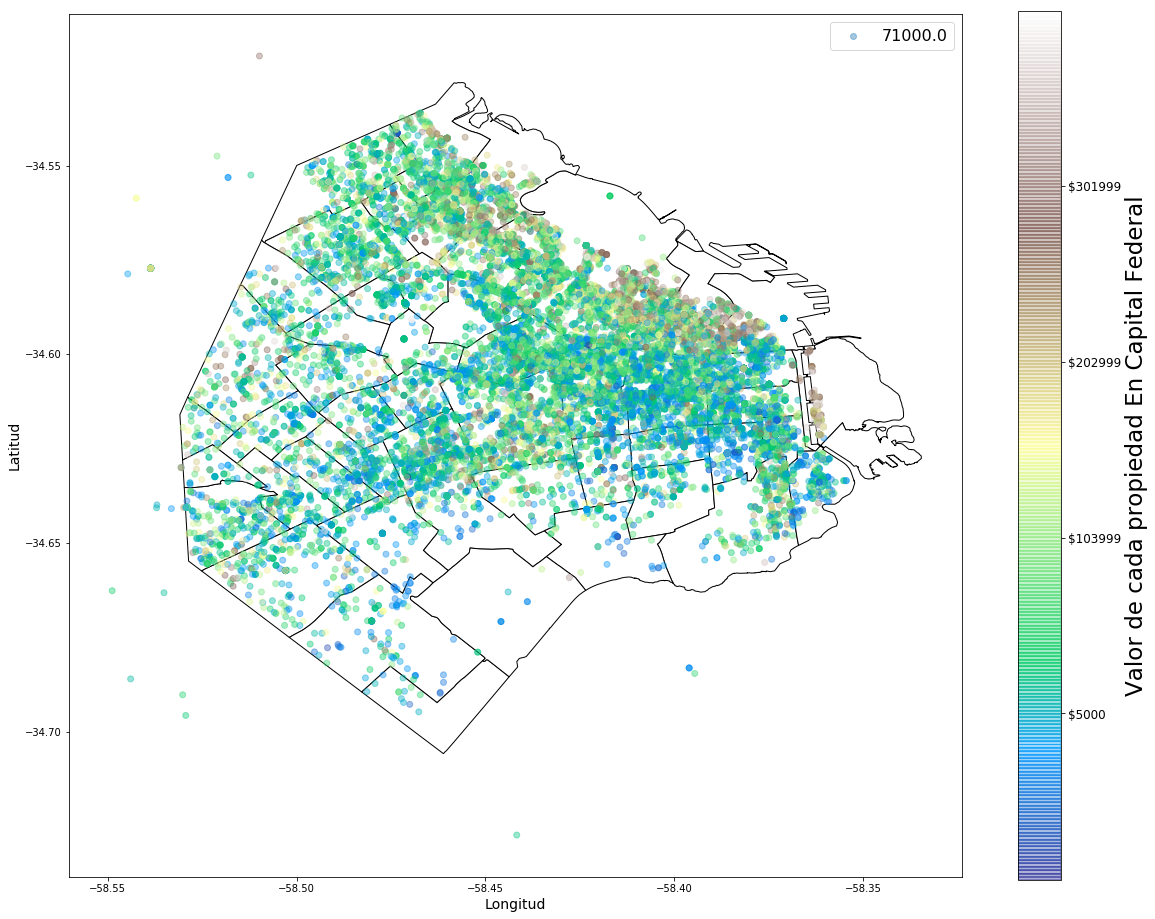

In [5]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital["price"],cmap='terrain')

plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)


mx = max(propCapital['price'])
mn = min(propCapital['price'])
md = (mx)/2

tick_values = np.linspace(mn, mx,6)
cbar = plt.colorbar()
cbar.set_cmap("terrain")
cbar.solids.set_edgecolor("face")
cbar.solids.set_cmap("terrain")
cbar.ax.set_yticklabels(["$%d"%(v) for v in tick_values], fontsize=12)
cbar.set_label('Valor de cada propiedad En Capital Federal', fontsize=23)


plt.legend(propCapital['price'],fontsize=16)
plt.show()



In [6]:
propCapital['code_prop'] = 'turquoise'

propCapital['code_prop'] = np.where(propCapital['property_type']=='house', 'orange', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='PH', 'crimson', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='store','darkorchid', propCapital['code_prop'])

propCapital.head()
        

    

,property_type,place_name,rooms,lat,lon,price,code_prop
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,turquoise
360734,apartment,Villa del Parque,2.0,-34.610611,-58.479590,96000.0,turquoise
360735,apartment,Villa del Parque,2.0,-34.610611,-58.479590,86000.0,turquoise
360742,apartment,Barracas,1.0,-34.639086,-58.369347,165000.0,turquoise
360789,apartment,Flores,3.0,-34.626397,-58.468476,92500.0,turquoise


In [7]:
tipoDePropiedades = propCapital.groupby('property_type').agg([np.size])
tipoDePropiedades.head()

,place_name,rooms,lat,lon,price,code_prop
,size,size,size,size,size,size
property_type,,,,,,
PH,1766,1766.0,1766.0,1766.0,1766.0,1766
apartment,18835,18835.0,18835.0,18835.0,18835.0,18835
house,585,585.0,585.0,585.0,585.0,585
store,87,87.0,87.0,87.0,87.0,87


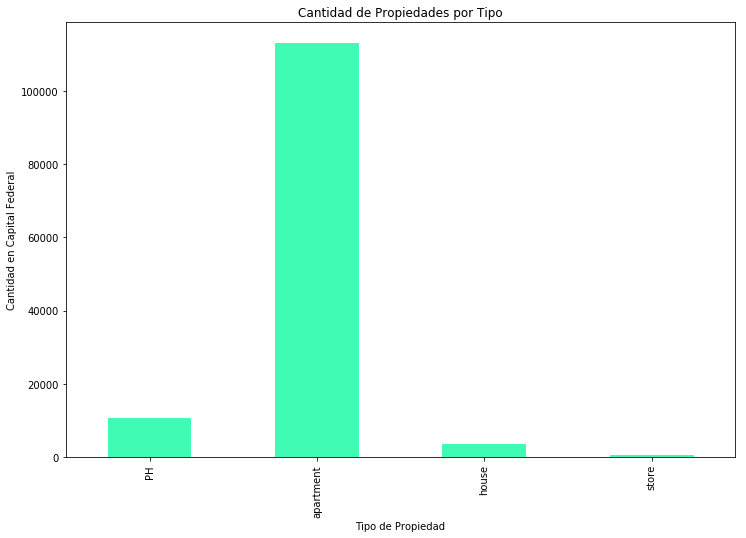

In [8]:
f = plt.figure()

plt.title ('Cantidad de Propiedades por Tipo',color='black')

ax = tipoDePropiedades.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal')
ax.set_xlabel('Tipo de Propiedad')
plt.show()


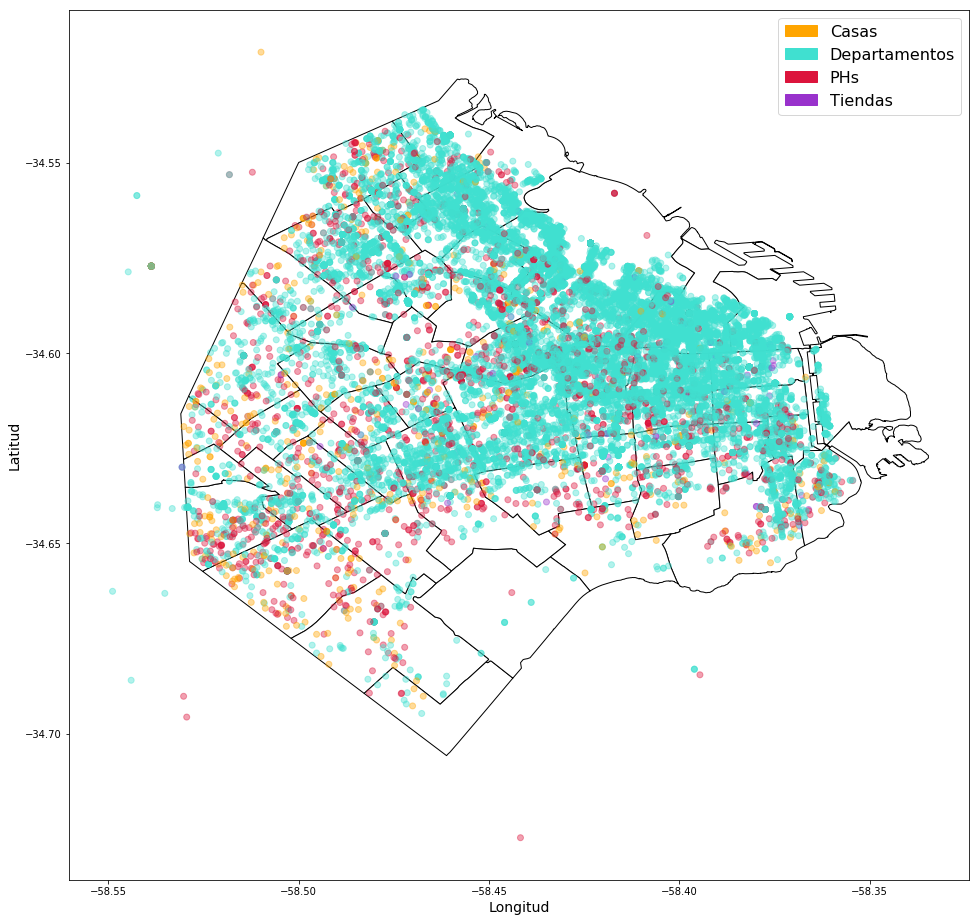

In [9]:
import matplotlib.patches as mpatches

mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_prop'])

plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)



red_patch = mpatches.Patch(color='orange', label='Casas')
blue_patch = mpatches.Patch(color='turquoise', label='Departamentos')

green_patch = mpatches.Patch(color='crimson', label='PHs')

yellow_patch = mpatches.Patch(color='darkorchid', label='Tiendas')

plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch],fontsize=16)
plt.show()

Por mucho el tipo de propiedad dominante son los departamentos en Capital Federal, ahora cuantos ambientes tiene el departamento promedio de capital federal


In [13]:
apartamentos = propCapital[propCapital['property_type'] == 'apartment']
apartamentos = propCapital[propCapital['rooms'] <7]
apartamentosPorAmbiente = apartamentos.groupby('rooms').agg([np.size])
apartamentosPorAmbiente.head()

,property_type,place_name,lat,lon,price,code_prop
,size,size,size,size,size,size
rooms,,,,,,
1.0,4894,4894,4894.0,4894.0,4894.0,4894
2.0,5846,5846,5846.0,5846.0,5846.0,5846
3.0,5599,5599,5599.0,5599.0,5599.0,5599
4.0,3504,3504,3504.0,3504.0,3504.0,3504
5.0,968,968,968.0,968.0,968.0,968


In [17]:
#propCapital['code_rooms'] = 'turquoise'

propCapital['code_rooms'] = np.where(propCapital['rooms']==1, 'lightcoral', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==2, 'lightgreen', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==3,'royalblue', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==4, 'dimgray', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==5, 'khaki', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==6,'yellow', propCapital['code_rooms'])

propCapital.head()

,property_type,place_name,rooms,lat,lon,price,code_prop,code_rooms
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,turquoise,lightcoral
360734,apartment,Villa del Parque,2.0,-34.610611,-58.479590,96000.0,turquoise,lightgreen
360735,apartment,Villa del Parque,2.0,-34.610611,-58.479590,86000.0,turquoise,lightgreen
360742,apartment,Barracas,1.0,-34.639086,-58.369347,165000.0,turquoise,lightcoral
360789,apartment,Flores,3.0,-34.626397,-58.468476,92500.0,turquoise,royalblue


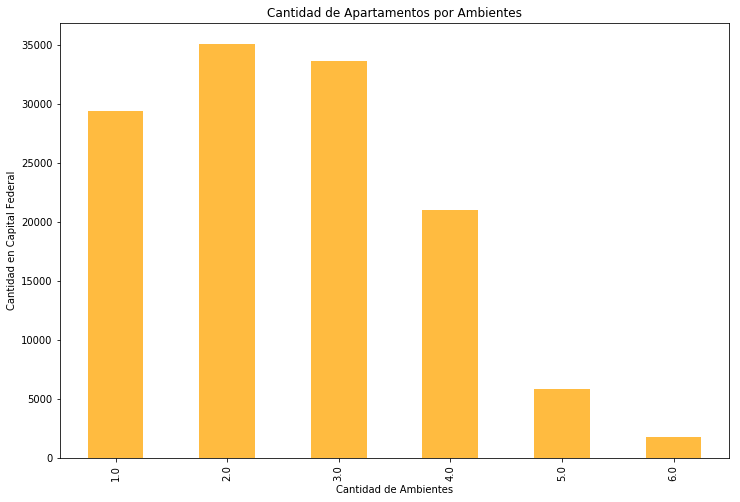

In [18]:
f = plt.figure()

plt.title ('Cantidad de Apartamentos por Ambientes',color='black')

ax = apartamentosPorAmbiente.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='orange')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal')
ax.set_xlabel('Cantidad de Ambientes')
plt.show()


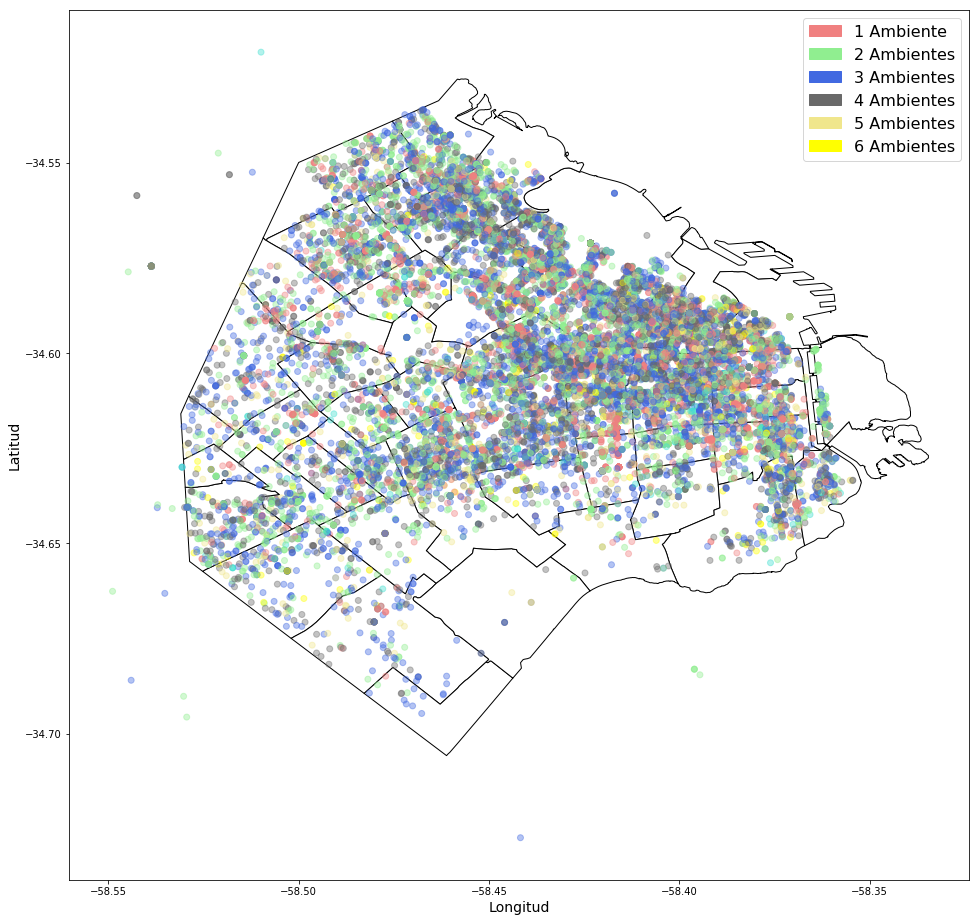

In [21]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_rooms'])

plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)

lightcoral_patch = mpatches.Patch(color='lightcoral', label='1 Ambiente')
lightgreen_patch = mpatches.Patch(color='lightgreen', label='2 Ambientes')
royalblue_patch = mpatches.Patch(color='royalblue', label='3 Ambientes')
dimgray_patch = mpatches.Patch(color='dimgray', label='4 Ambientes')
khaki_patch = mpatches.Patch(color='khaki', label='5 Ambientes')
yellow_patch = mpatches.Patch(color='yellow', label='6 Ambientes')


plt.legend(handles=[lightcoral_patch,lightgreen_patch,royalblue_patch,dimgray_patch,khaki_patch,yellow_patch],fontsize=16)
plt.show()

In [28]:
#Data de properati
df = pd.read_csv('/home/matias/Escritorio/Enviroment/datos_procesados.csv')
buenosAires = df[df.state_name.str.contains('Buenos Aires',na=False)]
bsAs= df[df.state_name.str.contains('G.B.A.', na=False)]
propBuenosAires = pd.concat([buenosAires, bsAs])
propBuenosAires = propBuenosAires[['property_type','place_name','rooms','lat','lon','price']]
propBuenosAires.dropna(inplace = True)
propBuenosAires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28147 entries, 360730 to 493554
Data columns (total 6 columns):
property_type    28147 non-null object
place_name       28147 non-null object
rooms            28147 non-null float64
lat              28147 non-null float64
lon              28147 non-null float64
price            28147 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


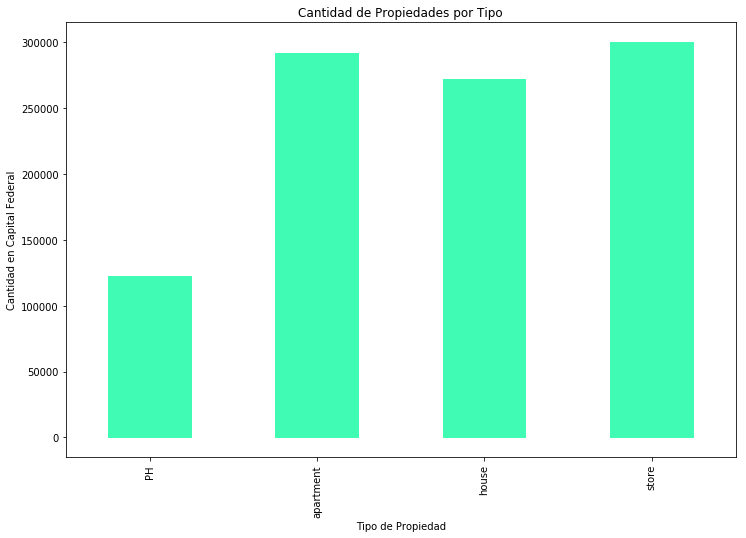

In [29]:
ptBuenosAires = propBuenosAires.groupby('property_type').agg([np.mean])
f = plt.figure()

plt.title ('Cantidad de Propiedades por Tipo',color='black')

ax = ptBuenosAires.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal')
ax.set_xlabel('Tipo de Propiedad')
plt.show()

Por le nivel de urbanizacion menor en provincia de Buenos Aires predominan las casas sobre los departamentos